## Build RAG Locally on Personal PC with DeepSeek R1-1.5B Model

RAG PDF Dataset: https://github.com/laxmimerit/rag-dataset

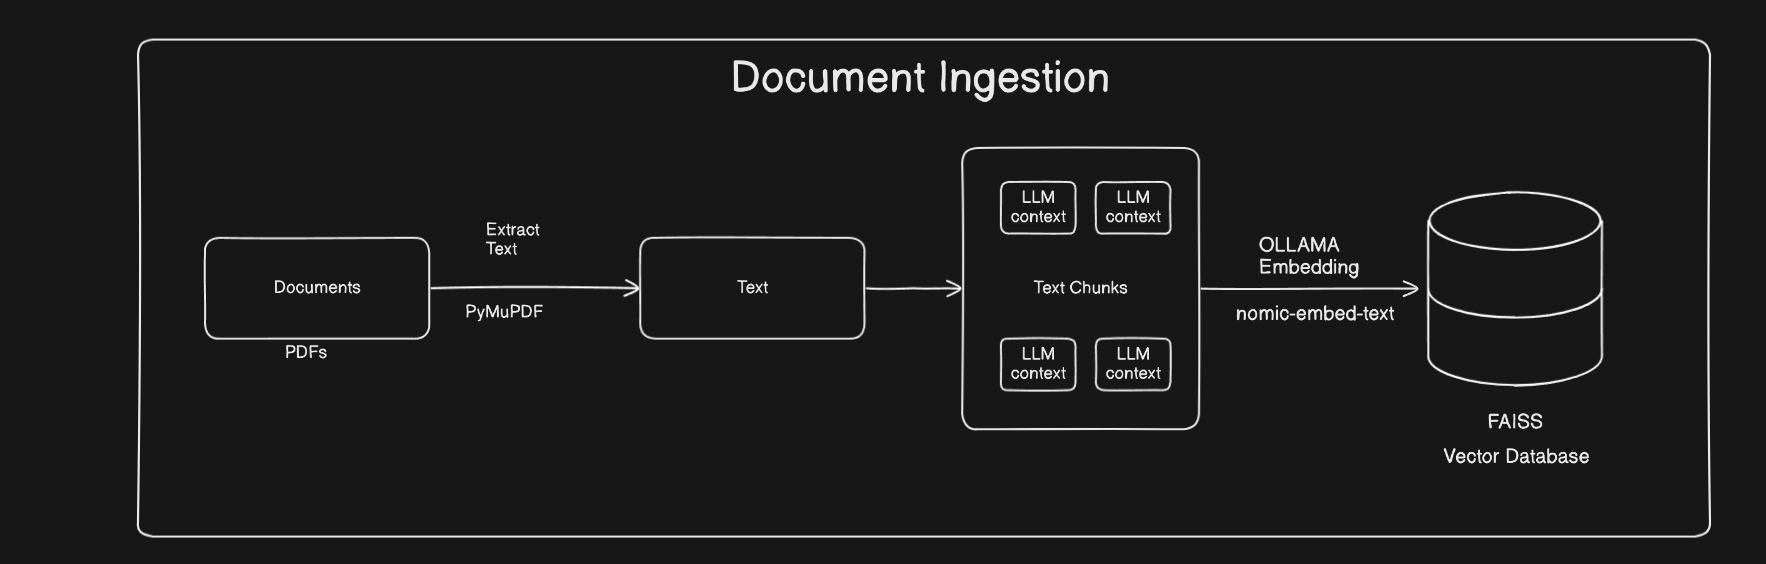

In [1]:
# pip install -U langchain-community faiss-cpu langchain-huggingface pymupdf tiktoken langchain-ollama python-dotenv

In [90]:
# Environment setup
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
warnings.filterwarnings("ignore")
load_dotenv()

True

In [91]:
import os
import warnings
from dotenv import load_dotenv
from docling.document_converter import DocumentConverter
from pathlib import Path
from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_ollama import OllamaEmbeddings
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama import ChatOllama


In [92]:

# Document conversion
def load_and_convert_document(file_path):
    converter = DocumentConverter()
    result = converter.convert(file_path)
    return result.document.export_to_markdown()

# Splitting markdown content into chunks
def get_markdown_splits(markdown_content):
    headers_to_split_on = [("#", "Header 1"), ("##", "Header 2"), ("###", "Header 3")]
    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, strip_headers=False)
    return markdown_splitter.split_text(markdown_content)

# Embedding and vector store setup
def setup_vector_store(chunks):
    embeddings = OllamaEmbeddings(model='nomic-embed-text', base_url="http://localhost:11434")
    single_vector = embeddings.embed_query("this is some text data")
    index = faiss.IndexFlatL2(len(single_vector))
    vector_store = FAISS(
        embedding_function=embeddings,
        index=index,
        docstore=InMemoryDocstore(),
        index_to_docstore_id={}
    )
    vector_store.add_documents(documents=chunks)
    return vector_store

# Formatting documents for RAG
def format_docs(docs):
    return "\n\n".join([doc.page_content for doc in docs])

# Setting up the RAG chain
def create_rag_chain(retriever):
    prompt = """
        You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
        If you don't know the answer, just say that you don't know.
        Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.
        Question: {question} 
        Context: {context} 
        Answer:
    """
    model = ChatOllama(model="deepseek-r1:1.5b", base_url="http://localhost:11434")
    prompt_template = ChatPromptTemplate.from_template(prompt)
    return (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt_template
        | model
        | StrOutputParser()
    )


In [ ]:
# Load document
source = "rag-dataset/goog-10-q-q3-2024.pdf"
markdown_content = load_and_convert_document(source)
chunks = get_markdown_splits(markdown_content)

# Create vector store
vector_store = setup_vector_store(chunks)

# Setup retriever
retriever = vector_store.as_retriever(search_type="mmr", search_kwargs={'k': 3})

# Create RAG chain
rag_chain = create_rag_chain(retriever)

# Questions for retrieval
questions = "How much revenue is there for Google?"
questions = "What is the net income for this quarter, and what are the key drivers contributing to its increase or decrease?"
questions = "Has the company provided guidance for the next quarter or fiscal year? If so, what are the expected revenue and profit margins?"
questions = "Which business segment contributed the most to the company's revenue, and what was the percentage growth in that segment?"
questions = "How has the stock market reacted to this earnings report, and were there any notable comments from the CEO or CFO about future performance?"

# Answer questions
for question in questions:
    print(f"Question: {question}")
    for chunk in rag_chain.stream(question):
        print(chunk, end="", flush=True)
    print("\n" + "-" * 50 + "\n")

Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAt

Question: H
<think>
Okay, so I need to figure out the answer for Alphabet Inc.'s revenue growth from September 2023 to September 2024 based on the provided table. Let me start by looking through the information given carefully.

First, there's a table that shows revenue data split into EMEA, APAC, and Other Americas. For each country and each year (2023 and 2024), they report their revenues along with changes due to foreign currency exchange rates and hedging gains/losses.

In the first table, for the entire company's total revenue in 2023 and 2024, it mentions that EMEA growth was unfavorable because of U.S. dollar strengthening relative to Turkish lira, APAC had similar reasons but mainly due to yen, and Other Americas were favorable due to Argentine and real currencies.

Similarly, for the nine months ended September 2024 in 2023 and 2024, it also provides a breakdown with U.S. dollar strength affecting EMEA, mostly from the Turkish lira, while APAC was affected by Japanese yen but 

### Document Loader

In [34]:
# !pip install langchain_docling
# !pip install docling
from docling.document_converter import DocumentConverter
import os
from pathlib import Path

source = "rag-dataset/goog-10-q-q3-2024.pdf"

converter = DocumentConverter()
result = converter.convert(source)
markdown_content = result.document.export_to_markdown()

Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAt

### Document Chunking

In [61]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

def get_markdown_splits(markdown_content):
    headers_to_split_on = [
        ("#", "Header 1"),
        ("##", "Header 2"),
        ("###", "Header 3"),
    ]

    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, strip_headers=False)
    md_header_splits = markdown_splitter.split_text(markdown_content)

    return md_header_splits

chunks = get_markdown_splits(markdown_content)

In [62]:
chunks[0].page_content
len(chunks)

159

### Document Vector Embedding

In [63]:
from langchain_ollama import OllamaEmbeddings

import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [64]:
embeddings = OllamaEmbeddings(model='nomic-embed-text', base_url="http://localhost:11434")

single_vector = embeddings.embed_query("this is some text data")


In [65]:
len(single_vector)

768

In [66]:
index = faiss.IndexFlatL2(len(single_vector))
index.ntotal, index.d

(0, 768)

In [67]:
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={}
)

In [68]:
len(chunks)

159

In [69]:
chunks

[Document(metadata={'Header 2': 'UNITED STATES'}, page_content='## UNITED STATES'),
 Document(metadata={'Header 2': 'SECURITIES AND EXCHANGE COMMISSION'}, page_content='## SECURITIES AND EXCHANGE COMMISSION  \nWashington, D.C. 20549  \n\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_'),
 Document(metadata={'Header 2': 'FORM 10-Q'}, page_content='## FORM 10-Q  \n\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_  \n(Mark One)  \n- ☒ QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934  \nFor the quarterly period ended September 30

In [70]:
ids = vector_store.add_documents(documents=chunks)

In [71]:
vector_store.index_to_docstore_id
len(ids)

159

In [72]:
# store vector database
db_name = "finance_google"
vector_store.save_local(db_name)

# # load vector database
# new_vector_store = FAISS.load_local(db_name, embeddings=embeddings, allow_dangerous_deserialization=True)
# len(new_vector_store.index_to_docstore_id)

### Retreival

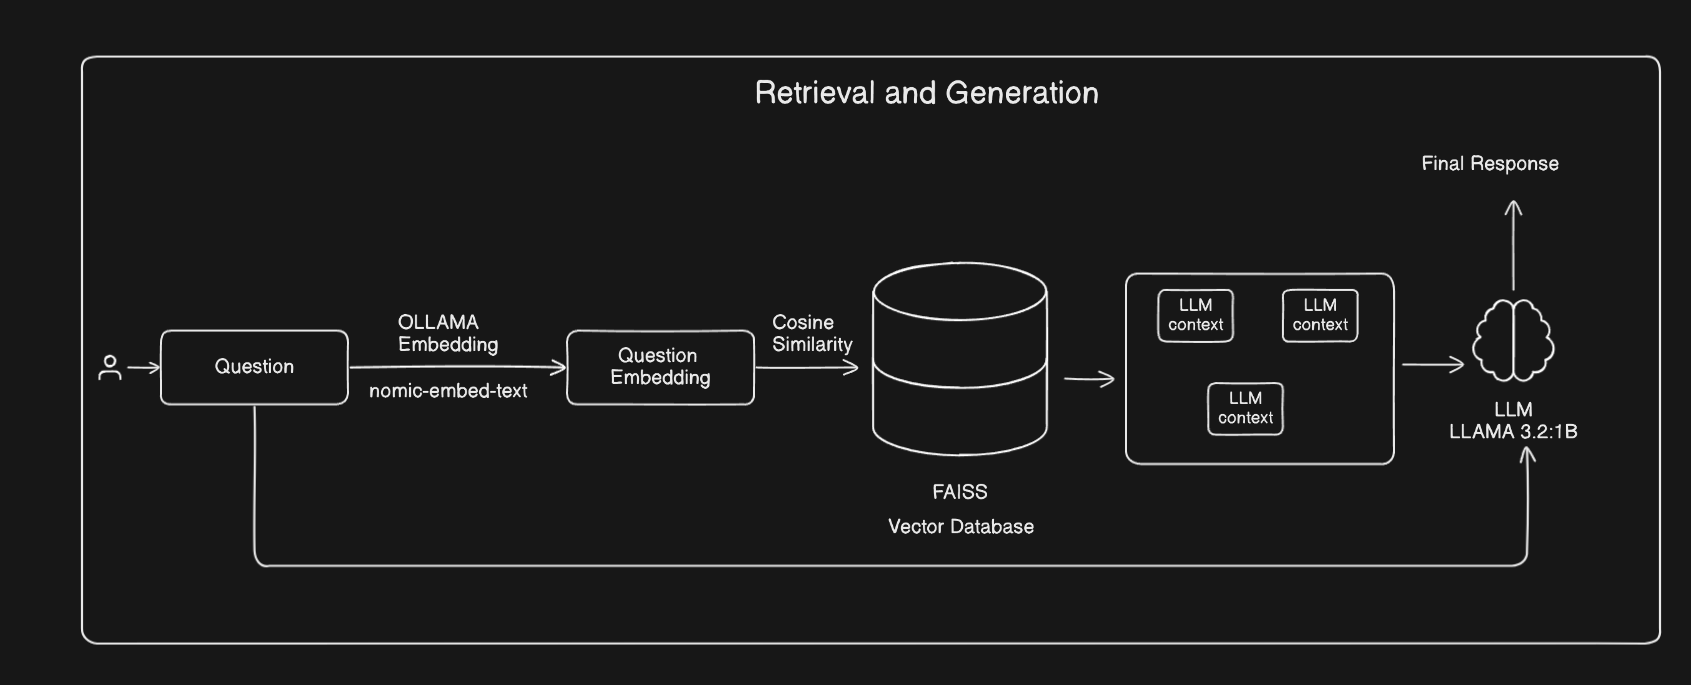

In [84]:
question = "how much revenue is there for google?"
# docs = vector_store.search(query=question, search_type='mmr')

# for doc in docs:
#     print(doc.page_content)
#     print("\n\n")

In [74]:
retriever = vector_store.as_retriever(search_type="mmr", search_kwargs = {'k': 3})

In [75]:
docs = retriever.invoke(question)

for doc in docs:
    print(doc.page_content)
    print("\n\n")


## Google advertising revenues



## Revenue Backlog  
As of  September 30, 2024, we had $86.8 billion of remaining performance obligations ('revenue backlog'), primarily related to Google Cloud. Our revenue backlog represents commitments in customer contracts for future services  that  have  not  yet  been  recognized  as  revenue.  The  estimated  revenue  backlog  and  timing  of  revenue recognition  for  these  commitments  is  largely  driven  by  our  ability  to  deliver  in  accordance  with  relevant  contract terms and when our customers utilize services. We expect to recognize approximately half of the revenue backlog as revenues over the next 24 months with the remainder to be recognized thereafter. Revenue backlog includes related deferred revenue currently recorded as well as amounts that will be invoiced in future periods, and excludes contracts with an original expected term of one year or less and cancellable contracts.



## NM = Not Meaningful  
- · Revenues were $8

### RAG with LLAMA 3.2 on OLLAMA

In [76]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate

from langchain_ollama import ChatOllama

In [77]:
model = ChatOllama(model="deepseek-r1:1.5b", base_url="http://localhost:11434")

model.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'model': 'deepseek-r1:1.5b', 'created_at': '2025-01-28T17:58:12.6122591Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1415580100, 'load_duration': 1115098700, 'prompt_eval_count': 4, 'prompt_eval_duration': 102000000, 'eval_count': 16, 'eval_duration': 196000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-0c376360-fc3c-4c99-b813-0a57fd1cb529-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [78]:
prompt = hub.pull("rlm/rag-prompt")

In [79]:
prompt = """
    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
    If you don't know the answer, just say that you don't know.
    Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.
    Question: {question} 
    Context: {context} 
    Answer:
"""

prompt = ChatPromptTemplate.from_template(prompt)

In [80]:
def format_docs(docs):
    return "\n\n".join([doc.page_content for doc in docs])

# print(format_docs(docs))

In [81]:
rag_chain = (
    {"context": retriever|format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [89]:
question = "how much revenue is received by google?"
question = "What is the net income for this quarter, and what are the key drivers contributing to its increase or decrease?"
question = "Has the company provided guidance for the next quarter or fiscal year? If so, what are the expected revenue and profit margins?"
question = "Which business segment contributed the most to the company's revenue, and what was the percentage growth in that segment?"
question = "How has the stock market reacted to this earnings report, and were there any notable comments from the CEO or CFO about future performance?"

for chunk in rag_chain.stream(question):
    print(chunk, end="", flush=True)


<think>
Okay, so I need to figure out how the stock market reacted to this earnings report, and whether there were any notable comments from the CEO or CFO about future performance.

First, let me read through the context carefully. The context talks about a management evaluation of disclosure controls and procedures under Rule 13a-15. It mentions that as of September 30, 2024, they evaluated these controls at a reasonable assurance level and found them effective. This seems like an improvement compared to previous years.

Looking at the financial results, the company reported certain figures in both the annual report and the quarterly report. For example, total assets increased from $402,392 in the previous year to $430,266 this year. Similarly, liabilities rose from $119,013 to $116,147, which is actually a decrease by about $2,866.

Wait, that's interesting because assets increased while liabilities decreased. Maybe the company had some favorable transactions or improvements in thei